In [130]:
import numpy as np
import matplotlib.pyplot as plt

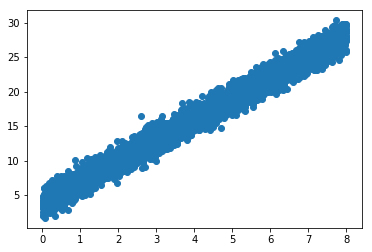

In [164]:
X = 8 * np.random.rand(5000,1) 
Y = 4 + 3 * X + np.random.randn(5000,1)
plt.scatter(X,Y)

### 正规方程求解

In [165]:
B = np.c_[np.ones((5000, 1)), X]
A = np.linalg.inv(B.T.dot(B)).dot(B.T).dot(Y)
A

array([[3.99237935],
       [2.99987335]])

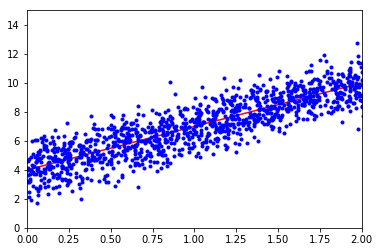

In [166]:
# 预测
X_news = np.array([0,1,3]).reshape(3,1)
X_new = np.c_[np.ones((3,1)),X_news]
C = X_new.dot(A)
# 绘图
plt.plot(X_news,C,"r-")
plt.plot(X,Y,"b.") 
plt.axis([0,2,0,15]) 
plt.show()

In [167]:
# skelarn预测
from sklearn.linear_model import LinearRegression
L = LinearRegression()
L.fit(X,Y)
L.intercept_,L.coef_

(array([3.99237935]), array([[2.99987335]]))

### 梯度下降法

In [ ]:
eta = 0.01
# 学习率 
n_iterations = 70000
m = 5000
theta = np.random.randn(2,1) 
# 随机初始值 
for iteration in range(n_iterations): 
    gradients = 2/m * B.T.dot(B.dot(theta) - Y) 
    theta = theta - eta * gradients
theta

### 随机梯度下降法

In [199]:
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1) 
sgd_reg.fit(X,Y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


(array([4.01796736]), array([3.04502804]))

### 多项式回归

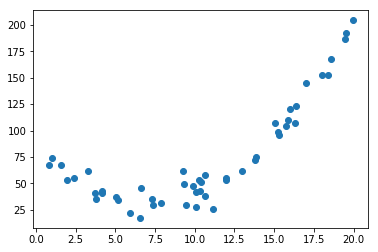

In [252]:
x = 20*np.random.rand(50,1)
y = 30 + (x-7)**2 + 10*np.random.randn(50,1) 
plt.scatter(x,y)

In [253]:
# 构造高次项
from sklearn.preprocessing import PolynomialFeatures 
PO = PolynomialFeatures(degree=2,include_bias=False) 
X_po = PO.fit_transform(x) 
# 线性回归拟合
lin_reg = LinearRegression() 
lin_reg.fit(X_po, y)
lin_reg.intercept_, lin_reg.coef_

(array([83.61502117]), array([[-14.48707069,   1.02004447]]))

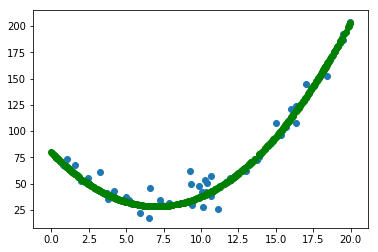

In [267]:
x1 = 20*np.random.rand(500,1)
y1 = 79.67403014 + -14.60692648*x1 + 1.04008937*x1**2
plt.scatter(x,y)
plt.scatter(x1,y1,color = "green")